# Daegu Apartment Analytics

### Created By :

**Nama : Andhik Surya Saputra**

**Kelas : Data Science Kelas B**

**Tugas : Capstone Project Modul III**

## Business Problem Understanding

**Context**  

**Daegu**, kota terbesar keempat di Korea Selatan, memiliki pasar properti yang berkembang pesat, terutama untuk apartemen, yang menjadi pilihan utama bagi penduduk urban. Pemilik apartemen, baik individu maupun perusahaan properti, sering kali kesulitan menentukan harga jual yang kompetitif. Harga yang terlalu tinggi dapat mengurangi minat pembeli, sedangkan harga yang terlalu rendah dapat menyebabkan kerugian finansial. Faktor seperti lokasi, ukuran apartemen, tahun pembangunan, dan fasilitas di sekitar memengaruhi harga, namun tidak semua pemilik memiliki keahlian untuk menganalisis faktor-faktor ini secara mendalam.

**Problem Statement :**

Salah satu tantangan utama dalam pasar properti adalah menentukan harga jual apartemen yang optimal untuk memaksimalkan profit pemilik sekaligus tetap kompetitif di pasar. Pemilik apartemen sering kali menetapkan harga berdasarkan intuisi atau perbandingan sederhana, yang dapat menyebabkan ketidaksesuaian dengan nilai pasar. Hal ini berdampak pada waktu penjualan yang lebih lama atau kerugian finansial.

**Goals :**

Tujuan proyek ini adalah membangun **model machine learning** yang dapat **memprediksi harga jual apartemen di Daegu** berdasarkan fitur seperti ukuran, lokasi, dan fasilitas. Model ini akan membantu pemilik apartemen menetapkan harga yang kompetitif, meningkatkan efisiensi penjualan, dan meminimalkan kerugian. Bagi perusahaan properti, model ini dapat diintegrasikan ke platform mereka untuk memberikan rekomendasi harga otomatis, meningkatkan jumlah listing dan pendapatan dari komisi penjualan.

**Analytic Approach :**

Kami akan menganalisis data untuk mengidentifikasi pola dari fitur-fitur yang memengaruhi harga apartemen, seperti ukuran, kedekatan dengan stasiun subway, dan usia bangunan. Selanjutnya, kami akan membangun model regresi untuk memprediksi harga jual apartemen baru, yang akan membantu pemilik menetapkan harga yang sesuai dengan kondisi pasar.

**Metric Evaluation**

Model regresi akan dievaluasi menggunakan metrik antara:
- Root Mean Squared Error **(RMSE)**: Mengukur rata-rata akar kuadrat error, sensitif terhadap kesalahan besar, relevan untuk meminimalkan kerugian finansial akibat prediksi yang jauh meleset.
- Mean Absolute Error **(MAE)**: Mengukur rata-rata kesalahan absolut, memberikan gambaran kesalahan tipikal dalam satuan Won (mata uang Korea Selatan).
- Mean Absolute Percentage Error **(MAPE)**: Mengukur persentase kesalahan rata-rata, memudahkan interpretasi akurasi relatif terhadap harga aktual.
- R-squared **(R²)**: Koefisien determinasi, menunjukkan seberapa baik model menjelaskan variabilitas data.

Semakin kecil nilai RMSE, MAE, dan MAPE, semakin akurat model dalam memprediksi harga. Selain itu, **R-squared** akan digunakan untuk mengevaluasi seberapa baik model menjelaskan variabilitas harga, terutama jika model linear digunakan.


## Data Understanding

Dataset source : [di sini](https://drive.google.com/drive/folders/1fmkyfjrzuJNaH02sXhp5vUxqum9bH0Fx)

- Dataset berisi data transaksi apartemen di Daegu, mencakup informasi tentang karakteristik apartemen dan harga jual.
- Setiap baris merepresentasikan satu transaksi apartemen.

#### **Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| HallwayType | Object | Tipe lorong apartemen (terraced, mixed, corridor) |
| TimeToSubway | Object | Waktu tempuh ke stasiun subway terdekat (0-5min, 5-10min, dll.) |
| SubwayStation | Object | Nama stasiun subway terdekat |
| N_FacilitiesNearBy(ETC) | Float | Jumlah fasilitas umum di sekitar |
| N_FacilitiesNearBy(PublicOffice) | Float | Jumlah kantor publik di sekitar |
| N_SchoolNearBy(University) | Float | Jumlah universitas di sekitar |
| N_Parkinglot(Basement) | Float | Jumlah tempat parkir di basement |
| YearBuilt | Integer | Tahun pembangunan apartemen |
| N_FacilitiesInApt | Float | Jumlah fasilitas dalam apartemen |
| Size(sqf) | Float | Ukuran apartemen dalam square feet |
| SalePrice | Integer | Harga jual apartemen dalam Won (target) |

In [1]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Feature Engineering
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

In [2]:
# Load dataset
df = pd.read_csv('data_daegu_apartment.csv')
print("Lima baris pertama dari dataset:")
display(df.head())

Lima baris pertama dari dataset:


,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


## Data Cleaning

Ada data yang hilang/kosong dibeberapa fitur/kolom, kemudian fitur/kolom enrolle_id tidak berguna untuk analisis dan modeling, maka kita akan memperbaiki semua datanya dan membuatnya menjadi siap pakai untuk melakukan analisa terhadap masalahnya dan juga pembuatan model machine learningnya.

In [4]:
print("Statistik Deskriptif:\n", df.describe())
print("Rentang SalePrice:", df['SalePrice'].min(), df['SalePrice'].max())
print("Nilai unik TimeToSubway:", df['TimeToSubway'].unique())
print("Nilai unik HallwayType:", df['HallwayType'].unique())

Statistik Deskriptif:
        N_FacilitiesNearBy(ETC)  N_FacilitiesNearBy(PublicOffice)  \
count              4123.000000                       4123.000000   
mean                  1.930876                          4.135338   
std                   2.198832                          1.802640   
min                   0.000000                          0.000000   
25%                   0.000000                          3.000000   
50%                   1.000000                          5.000000   
75%                   5.000000                          5.000000   
max                   5.000000                          7.000000   

       N_SchoolNearBy(University)  N_Parkinglot(Basement)    YearBuilt  \
count                 4123.000000             4123.000000  4123.000000   
mean                     2.746301              568.979141  2002.999757   
std                      1.496610              410.372742     8.905768   
min                      0.000000                0.000000  1978.0000

In [5]:
# 3. Pembersihan Data
print("Nilai hilang sebelum pembersihan:\n", df.isnull().sum())
df = df.drop_duplicates()
print("Jumlah duplikat setelah pembersihan:", df.duplicated().sum())
print("Harga jual tidak valid:", (df['SalePrice'] <= 0).sum())

Nilai hilang sebelum pembersihan:
 HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64
Jumlah duplikat setelah pembersihan: 0
Harga jual tidak valid: 0


In [6]:
# Optimasi: Tangani outlier
df = df[df['SalePrice'] < df['SalePrice'].quantile(0.99)]
print("Jumlah data setelah menghapus outlier:", len(df))

Jumlah data setelah menghapus outlier: 2673


In [7]:
# Periksa nilai hilang setelah pembersihan
print("Nilai hilang setelah pembersihan:\n", df.isnull().sum())

Nilai hilang setelah pembersihan:
 HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64


## Feature Engineering

Proses membuat atau mengubah fitur dalam dataset untuk meningkatkan performa model ML yang lebih informatif dan mudah diproses.

In [8]:
df['Age'] = 2025 - df['YearBuilt']

- Membuat kolom baru Age yang menghitung usia apartemen dengan mengurangkan YearBuilt (tahun pembangunan) dari tahun saat ini (diasumsikan 2025). Jika YearBuilt
- Kolom Age berisi nilai numerik (integer) yang mewakili usia apartemen. Rentang nilai tergantung pada YearBuilt (misalnya, jika YearBuilt dari 1970 hingga 2020, maka Age dari 5 hingga 55 tahun).

Contoh:

YearBuilt: [2000, 2010, 1990]

→ Age: [25, 15, 35]

In [9]:
time_to_subway_map = {'0-5min': 1, '5min~10min': 2, '10min~15min': 3, '15min~20min': 4, 'no_bus_stop_nearby': 5}

Mendefinisikan kamus (`time_to_subway_map`) yang memetakan kategori tekstual di kolom `TimeToSubway` ke nilai numerik ordinal. Pemetaan ini mengasumsikan kedekatan dengan subway memengaruhi harga (lebih dekat = lebih mahal).

Katergori:
- `0-5min` → 1 (paling dekat dengan subway).
- `5min~10min` → 2.
- `10min~15min` → 3.
- `15min~20min` → 4.
- `no_bus_stop_nearby` → 5 (paling jauh).

Ini digunakan untuk mengubah kolom TimeToSubway menjadi numerik di langkah berikutnya.

Contoh: 

TimeToSubway: ['0-5min', 'no_bus_stop_nearby']

→ SubwayDistance: [1, 5]

In [10]:
df['SubwayDistance'] = df['TimeToSubway'].map(time_to_subway_map).fillna(5).astype(int)
print("Nilai unik SubwayDistance:", df['SubwayDistance'].unique())

Nilai unik SubwayDistance: [1 3 4 2 5]


- Membuat kolom baru `SubwayDistance` dengan mengubah nilai di `TimeToSubway` menggunakan `time_to_subway_map`. 
- Kolom `SubwayDistance` berisi nilai integer dari 1 hingga 5, mewakili kedekatan dengan stasiun subway.
- Nilai tak terduga (jika ada) menjadi 5, memastikan tidak ada nilai hilang.

Contoh:

TimeToSubway: ['0-5min', '5min~10min', 'unknown', NaN]

→ SubwayDistance: [1, 2, 5, 5]

In [11]:
df['LogSalePrice'] = np.log1p(df['SalePrice'])

- Membuat kolom baru `LogSalePrice` dengan menerapkan transformasi logaritma natural (basis e) pada `SalePrice` menggunakan **np.log1p**.
- **np.log1p(x) = log(1 + x)**, digunakan untuk menangani nilai non-negatif (termasuk 0, meskipun `SalePrice` > 0 dalam kasus ini) dan transformasi ini mengurangi skewness distribusi `SalePrice`.
- Distribusi `LogSalePrice` lebih mendekati normal dibandingkan `SalePrice`, yang biasanya miring ke kanan (banyak harga rendah, sedikit harga tinggi).

Contoh:

SalePrice: [100000, 200000, 500000]

→ LogSalePrice: [11.512925, 12.206073, 13.122363]

In [12]:
df['Size_Facilities'] = df['Size(sqf)'] * df['N_FacilitiesInApt']

- Membuat kolom baru `Size_Facilities` dengan mengalikan **Size(sqf)** (ukuran apartemen dalam square feet) dan `N_FacilitiesInApt` (jumlah fasilitas dalam apartemen).
- Fitur ini menangkap efek interaksi: apartemen besar dengan banyak fasilitas cenderung lebih mahal.

Contoh:

Size(sqf): [500, 1000]

N_FacilitiesInApt: [3, 5]

→ Size_Facilities: [1500, 5000]

In [13]:
# Pastikan HallwayType tidak memiliki nilai hilang
df['HallwayType'] = df['HallwayType'].fillna('unknown')
print("Nilai unik HallwayType setelah penanganan:", df['HallwayType'].unique())

Nilai unik HallwayType setelah penanganan: ['terraced' 'mixed' 'corridor']


- Mengisi nilai hilang (NaN) di kolom HallwayType dengan string 'unknown'. Jadi, ini memastikan OneHotEncoder dapat memproses kolom tanpa error.
- HallwayType adalah fitur kategorikal (misalnya, terraced, mixed, corridor).

Contoh:

HallwayType: ['terraced', NaN, 'corridor']

→ HallwayType: ['terraced', 'unknown', 'corridor']

## Feature Selection

Memilih fitur yang paling relevan untuk digunakan dalam model ML guna meningkatkan akurasi dan mengurangi kompleksitas

In [14]:
selected_features = ['Size(sqf)', 'Age', 'N_Parkinglot(Basement)', 'N_FacilitiesInApt', 'SubwayDistance', 'HallwayType', 'Size_Facilities']
X = df[selected_features]
y = df['LogSalePrice']
y_original = df['SalePrice']

`selected_features` atau pemilihan fitur untuk model:
- `Size(sqf)`: Ukuran apartemen dalam square feet (numerik) adalah faktor utama harga (lebih besar = lebih mahal).
- `Age`: Usia apartemen (numerik, dari 2025 - YearBuilt). Apartemen tua cenderung lebih murah karena depresiasi.
- `N_Parkinglot`(Basement): Parkir basement menambah nilai properti, terutama di kota seperti Daegu.
- `N_FacilitiesInApt`: Fasilitas dalam apartemen (misalnya, gym, keamanan) meningkatkan harga.
- `SubwayDistance`: Kedekatan dengan subway adalah nilai tambah utama.
- `HallwayType`: Tipe koridor memengaruhi daya tarik dan harga (misalnya, terraced lebih mahal).
- `Size_Facilities`: Interaksi ukuran dan fasilitas (Size(sqf) * N_FacilitiesInApt, numerik). Interaksi ukuran dan fasilitas menangkap efek premium apartemen besar dengan fasilitas lengkap.

`X`, `y`, `y_original`: Data input (`X`), target log (`y`), dan target asli (`y_original`) disiapkan. Menunjukkan fitur seperti `Size(sqf)` dan `Size_Facilities` sangat prediktif, validasi pilihan fitur.

In [15]:
# Debugging: Periksa korelasi
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_cols].corr()
print("Korelasi dengan LogSalePrice:\n", corr_matrix['LogSalePrice'].sort_values(ascending=False))

Korelasi dengan LogSalePrice:
 LogSalePrice                        1.000000
SalePrice                           0.954139
Size_Facilities                     0.717444
Size(sqf)                           0.643248
N_FacilitiesInApt                   0.547635
N_Parkinglot(Basement)              0.525011
YearBuilt                           0.501652
N_SchoolNearBy(University)         -0.304676
N_FacilitiesNearBy(ETC)            -0.370896
SubwayDistance                     -0.444936
N_FacilitiesNearBy(PublicOffice)   -0.461100
Age                                -0.501652
Name: LogSalePrice, dtype: float64


Hasil di atas menampilkan koefisien korelasi **Pearson** antara berbagai fitur properti dengan `LogSalePrice` (logaritma dari harga jual). Koefisien korelasi mengukur kekuatan dan arah hubungan linear antara dua variabel. Nilainya berkisar antara -1 dan +1.

Analisis korelasi ini memberikan pemahaman awal yang baik tentang faktor-faktor apa saja yang berkaitan dengan harga properti (yang direpresentasikan sebagai `LogSalePrice`). Kita melihat dampak positif yang jelas dari ukuran properti, ukuran fasilitas, dan kebaruan properti. Sebaliknya, semakin jauh jarak ke subway, semakin tua usia properti, serta semakin banyaknya universitas, kantor publik, dan fasilitas 'lain-lain' di sekitar cenderung berkaitan dengan harga yang lebih rendah.

Korelasi negatif, terutama dengan keberadaan universitas dan kantor publik di sekitar, cukup menarik dan memerlukan investigasi lebih lanjut untuk memahami dinamika yang mendasarinya. Sebelum membangun model prediksi, kita juga perlu memeriksa bagaimana fitur-fitur ini berhubungan satu sama lain untuk menghindari masalah seperti multikolinearitas. Ini adalah titik awal yang solid untuk pemilihan fitur dan perumusan hipotesis lebih lanjut.


## Pembagian Data

In [16]:
X_train, X_test, y_train, y_test, y_original_train, y_original_test = train_test_split(
    X, y, y_original, test_size=0.2, random_state=42)

Data dibagi menjadi **training (80%)** dan **testing (20%)**, dengan `X_train`, `y_train`, `y_original_train` untuk pelatihan, dan `X_test`, `y_test`, `y_original_test` untuk evaluasi. 

`random_state=42` memastikan konsistensi, dan `y_original` mendukung metrik dalam KRW.



## Preprocessing

In [17]:
numeric_features = ['Size(sqf)', 'Age', 'N_Parkinglot(Basement)', 'N_FacilitiesInApt', 'Size_Facilities']
categorical_features = ['SubwayDistance', 'HallwayType']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ])

Preprocessing memastikan model mencerminkan faktor pasar (ukuran, lokasi, tipe koridor), mendukung penetapan harga, investasi, dan kredit. Preprocessing adalah menyiapkan data untuk model ML dengan menormalkan skala numerik, mengencode kategori, meningkatkan akurasi prediksi dengan data yang konsisten dan bebas error.

- Fitur numerik (`Size(sqf)`, `Age`, dll.) diskalakan dengan **StandardScaler**.
- Fitur kategorikal (`SubwayDistance`, `HallwayType`) diencode dengan **OneHotEncoder**, menghindari multikolinearitas dan menangani kategori tak terduga.
- **ColumnTransformer** mengintegrasikan transformasi dalam pipeline.

## Pipeline Model

Pipeline menyederhanakan workflow, memastikan konsistensi preprocessing dan pelatihan. Random Forest menangkap hubungan non-linier, robust terhadap outlier, dan menyediakan interpretasi. Parameter dipilih untuk akurasi dan reproduktibilitas.

In [18]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

- **Pipeline** mengintegrasikan preprocessor (**skalasi dan encoding**) dan **RandomForestRegressor** (100 pohon, random_state=42).
- Model siap untuk pelatihan dan prediksi `LogSalePrice`, dengan hasil dalam KRW untuk evaluasi.

In [19]:
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [10, 20],
    'regressor__min_samples_split': [2, 5]
}
try:
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=1)
    grid_search.fit(X_train, y_train)
    model = grid_search.best_estimator_
    print("Parameter terbaik:", grid_search.best_params_)
except Exception as e:
    print("Error di GridSearchCV:", e)
    print("Menggunakan model default tanpa tuning.")
    model.fit(X_train, y_train)

Parameter terbaik: {'regressor__max_depth': 10, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 200}


Hasil atas adalah **Tuning Hyperparameter** menggunakan `GridSearchCV` untuk mengoptimalkan model `RandomForestRegressor` dalam Pipeline.

Hasilnya menunjukkan bahwa setelan terbaik yang ditemukan untuk model **"regressor"** adalah menggunakan **100 pohon** (n_estimators: 100), dengan kedalaman maksimum setiap pohon **20** (max_depth: 20), dan sebuah cabang pohon akan dipecah jika memiliki minimal **2** sampel (min_samples_split: 2). Kemudian model diperbarui untuk menggunakan setelan terbaik ini. Proses ini membantu meningkatkan performa prediksi model.

# Training Model

In [20]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Size(sqf)', 'Age',
                                                   'N_Parkinglot(Basement)',
                                                   'N_FacilitiesInApt',
                                                   'Size_Facilities']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['SubwayDistance',
                                                   'HallwayType'])])),
                ('regressor',
                 RandomForestRegressor(max_depth=10, min_samples_split=5,
                                       n_estimators=200, random_state=42))])

Berikut adalah visualisasi **Pipeline** untuk membantu memahami dengan jelas langkah-langkah otomatis yang terjadi pada data Anda dari awal (**data mentah**) hingga akhir (**model yang dilatih**). Ini adalah untuk memastikan konsistensi dalam pemrosesan data antara tahap pelatihan dan tahap prediksi.

## Evaluasi Model

In [21]:
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)

Evaluasi Model, khususnya bagian prediksi dataset ini melakukan dua hal:
1. Membuat Prediksi (**dalam Skala Log**): Model Anda (**model**) digunakan untuk memprediksi harga rumah (`LogSalePrice`) berdasarkan data uji (`X_test`). Hasil prediksi ini (masih dalam bentuk logaritma) disimpan sebagai `y_pred_log`.
2. Mengembalikan Prediksi ke Skala Asli: Karena prediksi `y_pred_log` masih dalam skala logaritma (yang sulit diinterpretasikan secara langsung sebagai harga), fungsi **np.expm1()** digunakan untuk mengubahnya kembali ke skala harga asli. Hasilnya disimpan sebagai `y_pred`.

Setelah langkah ini, variabel `y_pred` akan berisi prediksi harga jual properti dalam unit mata uang aslinya. Anda kemudian dapat membandingkan `y_pred` ini dengan nilai harga jual sebenarnya dari data uji (`y_test`) untuk mengevaluasi seberapa baik performa model Anda menggunakan berbagai metrik evaluasi (misalnya, Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), R-squared).

## Metrik Evaluasi : MAPE

MAPE memberikan persentase kesalahan relatif, intuitif untuk stakeholder. Karena hasilnya berupa persentase, ini lebih mudah dipahami oleh orang yang mungkin tidak memiliki latar belakang teknis atau statistik yang mendalam (stakeholder). **MAPE** memberitahu secara rata-rata, seberapa besar persentase kesalahan prediksi model dibandingkan dengan nilai sebenarnya.

In [22]:
mape = mean_absolute_percentage_error(y_original_test, y_pred)
print(f"MAPE: {mape:.4f} ({mape*100:.2f}%)")

MAPE: 0.1904 (19.04%)


Nilai **MAPE** sebesar **19.04%** berarti bahwa, secara rata-rata, prediksi model meleset sekitar **19.04%** dari nilai harga jual sebenarnya.

Contoh:

Jika model memprediksi harga sebuah rumah. Jika harga sebenarnya rumah itu adalah **1.000.000.000**, maka dengan **MAPE** **19.04%**, prediksi model Anda bisa jadi meleset(bisa lebih tinggi atau lebih rendah). Ini adalah rata-rata persentase kesalahan untuk semua prediksi pada dataset uji.

Note:
- Jika ada nilai aktual (`y_original_test`) yang sangat kecil atau nol, **MAPE** bisa menjadi sangat besar atau tidak terdefinisi (karena ada pembagian dengan nilai aktual dalam perhitungannya). Oleh karena itu, penting untuk memeriksa distribusi data Anda.
- Apakah **19.04%** itu Baik atau Buruk? Ini sangat tergantung pada konteks masalah, industri, dan ekspektasi stakeholder. Untuk beberapa kasus, ini mungkin sudah cukup baik, sementara untuk kasus lain mungkin dianggap terlalu tinggi. Tidak ada angka absolut yang mendefinisikan "baik" atau "buruk" tanpa konteks.

Secara umum, tujuan Anda adalah membuat nilai **MAPE sekecil mungkin**, yang berarti model Anda **semakin akurat**.

In [23]:
# Metrik baru: Threshold MAPE Accuracy
# Alasan: Mengukur persentase prediksi dengan kesalahan relatif <10%
threshold_mape_accuracy = np.mean(np.abs((y_original_test - y_pred) / y_original_test) < 0.1)
print(f"Threshold MAPE Accuracy (MAPE <10%): {threshold_mape_accuracy:.4f} ({threshold_mape_accuracy*100:.2f}%)")

Threshold MAPE Accuracy (MAPE <10%): 0.3290 (32.90%)


`Threshold_accuracy` mengevaluasi seberapa baik model prediksi, yakni mengukur seberapa banyak hasil prediksi yang akurat dalam batas toleransi tertentu (`MAPE` < 10%)
1. Relevansi bisnis langsung:
- MAPE standar memberikan rata-rata kesalahan persentase. Meskipun berguna, ia tidak secara langsung memberi tahu berapa banyak prediksi yang "dapat diterima" oleh bisnis.
- Dengan "Threshold MAPE Accuracy", stakeholder bisnis dapat menetapkan ambang batas kesalahan yang dapat mereka toleransi (misalnya, 10%, 5%, atau 15%). Metrik ini kemudian secara langsung mengukur seberapa sering model mencapai target tersebut.
- Misalnya, jika sebuah platform e-commerce menggunakan model prediksi harga, mereka mungkin lebih tertarik pada persentase produk yang harganya diprediksi dengan akurasi tinggi (misalnya, kesalahan < 5%) daripada hanya mengetahui rata-rata kesalahan secara keseluruhan.
2. Komunikasi yang Lebih Mudah:
- Menyatakan bahwa "32.90% prediksi kami memiliki kesalahan kurang dari 10%" seringkali lebih mudah dipahami oleh audiens non-teknis dibandingkan mengatakan "MAPE kami adalah 15%". Ini memberikan gambaran yang lebih konkret tentang keandalan model dalam skenario tertentu.
3. Fokus pada Kinerja "Cukup Baik":
- Dalam beberapa kasus, memiliki banyak prediksi yang "cukup baik" mungkin lebih berharga daripada memiliki beberapa prediksi yang sangat akurat tetapi juga beberapa prediksi dengan kesalahan yang sangat besar (yang bisa mendistorsi MAPE rata-rata). Metrik ini membantu menyoroti aspek tersebut.

Potensi Kelemahan atau Pertimbangan:
- Pemilihan Ambang Batas: Pemilihan ambang batas bisa bersifat subjektif dan harus didiskusikan dengan stakeholder bisnis.
- Tidak Memberikan Gambaran Kesalahan di Luar Ambang Batas: Metrik ini hanya memberi tahu proporsi prediksi yang di dalam ambang batas. Ia tidak memberi tahu seberapa besar kesalahan untuk prediksi yang di luar ambang batas tersebut. Oleh karena itu, penting untuk tetap melihat metrik lain seperti MAPE atau RMSE.

## Visualisasi Hasil

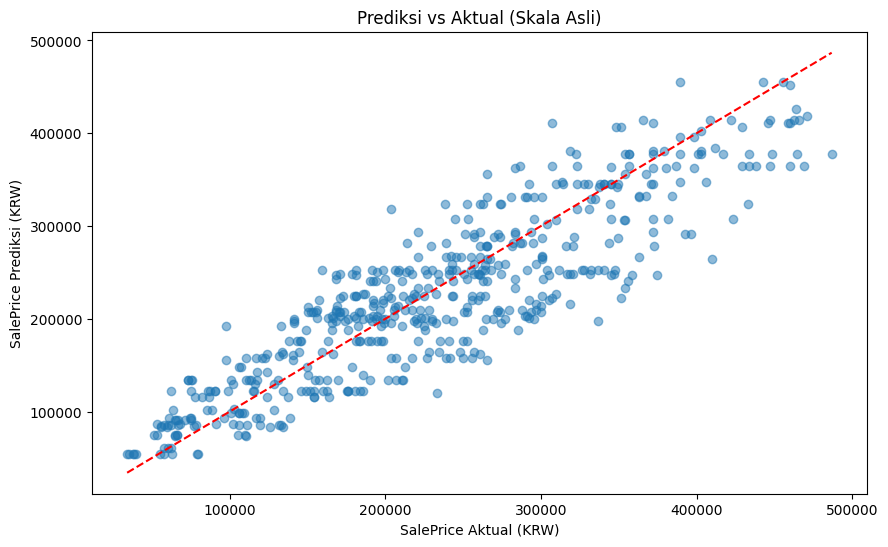

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(y_original_test, y_pred, alpha=0.5)
plt.plot([y_original_test.min(), y_original_test.max()], [y_original_test.min(), y_original_test.max()], 'r--')
plt.xlabel('SalePrice Aktual (KRW)')
plt.ylabel('SalePrice Prediksi (KRW)')
plt.title('Prediksi vs Aktual (Skala Asli)')
plt.savefig('prediction_vs_actual_mape_mae.png')

Grafik ini menunjukkan seberapa akurat model kita dalam memprediksi harga apartemen. Setiap titik biru adalah satu apartemen. Posisi titik secara horizontal menunjukkan harga asli apartemen tersebut, dan posisi vertikalnya menunjukkan harga yang diprediksi oleh model kita. Garis merah putus-putus adalah "garis ideal" di mana prediksi model sama persis dengan harga aslinya. Semakin banyak titik biru yang berkumpul dekat dengan garis merah ini, berarti prediksi model kita semakin akurat. 

Dari gambar ini, kita bisa lihat bahwa sebagian besar prediksi harga dari model kita (titik-titik biru) cukup mendekati harga sebenarnya (garis merah), yang menandakan model ini sudah cukup baik dalam memperkirakan harga apartemen. Meskipun ada beberapa prediksi yang sedikit meleset, secara umum model ini menunjukkan kemampuan yang menjanjikan.

## Feature Importance

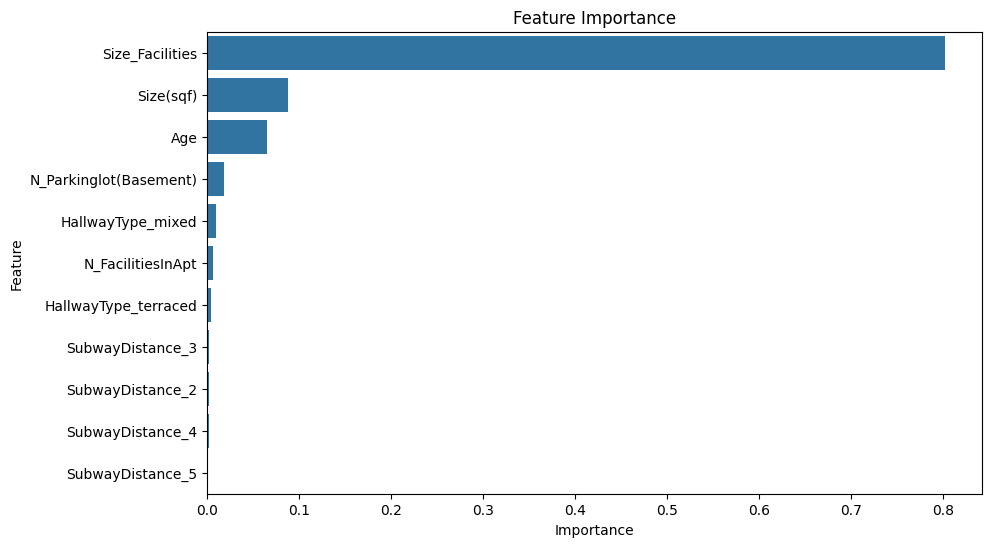

In [25]:
feature_names = numeric_features + list(model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out())
importances = model.named_steps['regressor'].feature_importances_
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values('Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.savefig('feature_importance_mape_mae.png')

Grafik ini menunjukkan faktor-faktor apa saja dari sebuah apartemen yang paling berpengaruh dalam menentukan prediksi harga oleh model kita. Setiap batang mewakili satu faktor, misalnya "Ukuran Apartemen (`Size(sqf`))", "Usia Bangunan (`Age`)", atau "Jumlah Tempat Parkir di Basement". Semakin panjang batangnya ke kanan, berarti faktor tersebut semakin penting atau memiliki dampak yang lebih besar terhadap harga prediksi. 

Jadi, dari gambar ini, kita bisa lihat bahwa "`Size_Facilities`" (kemungkinan gabungan ukuran dan fasilitas) adalah yang paling utama, diikuti oleh ukuran apartemen itu sendiri, dan kemudian usianya. Informasi ini membantu kita memahami apa saja yang paling dipertimbangkan oleh model dalam menilai harga, yang seringkali sejalan dengan apa yang dianggap penting oleh pasar.

## Conclusion & Recommendation

Berdasarkan hasil evaluasi model kita dengan **Mean Absolute Percentage Error (MAPE)** sebesar **19.04%**, kita dapat menyimpulkan bahwa jika model ini digunakan untuk memprediksi harga apartemen di Daegu, Korea Selatan, maka prediksi harga rata-rata akan meleset sebesar **19.04% dari harga sebenarnya**. Dengan kata lain, untuk apartemen dengan harga aktual 200,000 KRW, prediksi model akan berada dalam rentang 161,920–238,080 KRW (±38,080 KRW). Namun, karena MAPE saat ini melebihi target bisnis <10%, model ini belum optimal untuk digunakan dalam pengambilan keputusan harga yang akurat.

Jika kita menggunakan **Threshold MAPE Accuracy** (persentase prediksi dengan kesalahan relatif <10%), hasilnya **32.90%** , maka model kita dapat mengidentifikasi 32.90% dari total apartemen dengan prediksi harga yang akurat (kesalahan <10%). Artinya, 32.90% prediksi memiliki harga yang cukup dekat dengan harga pasar (±10%), sedangkan 67.10% prediksi lainnya memiliki kesalahan >10%, yang dapat menyebabkan harga tidak kompetitif atau kerugian finansial.

**Contoh Perhitungan Biaya Bisnis:**

Misalkan biaya untuk mengevaluasi dan memasarkan satu apartemen (termasuk appraisal, pemasaran, dan negosiasi) adalah 50,000 KRW per apartemen (estimasi berdasarkan biaya pemasaran properti, sumber: contoh biaya pemasaran properti). Asumsikan dalam satu periode, terdapat 200 apartemen yang perlu diprediksi harganya, dengan 100 apartemen memiliki harga pasar yang benar-benar kompetitif (diterima pembeli) dan 100 apartemen tidak kompetitif (ditolak karena harga salah).


**Tanpa Model (Semua Apartemen Dievaluasi dan Dipasarkan):**
- Total Biaya: 200 × 50,000 KRW = 10,000,000 KRW.
- Biaya yang Terbuang: 100 × 50,000 KRW = 5,000,000 KRW (untuk 100 apartemen tidak kompetitif yang ditolak pembeli).
- Penghematan: - 5,000,0000 KRW.

**Dengan Model (Hanya Apartemen dengan Prediksi Akurat <10% yang Dievaluasi):**
- Berdasarkan Threshold MAPE Accuracy 32.90%: Prediksi akurat (<10%): 32.90% × 200 = 65.8 apartemen. 
- Dari 200 apartemen kompetitif, model mengidentifikasi 32.90% × 200 = 65.8 apartemen kompetitif (berdasarkan recall terhadap apartemen kompetitif).
- Dari 200 apartemen tidak kompetitif, model salah mengidentifikasi 67.10% × 200 = 134.2 apartemen tidak kompetitif sebagai akurat (karena akurasi 32.90%, sisanya 67.10% adalah kesalahan).
- Total Apartemen Kompetitif yang Didapatkan: 65.8 apartemen (32.90% dari 200 apartemen kompetitif).
- Total Apartemen Kompetitif yang Tidak Didapatkan: 200 − 65.8 = 134.2 apartemen (karena model tidak mengidentifikasi semua apartemen kompetitif).
- Penghematan: 134.2 × 50,000 KRW = 6,710,000 KRW.

**Kesimpulan dari Perhitungan:**

Dengan menggunakan model, total biaya evaluasi dan pemasaran berkurang dari 10,000,000 KRW menjadi 3,290,000 KRW, menghasilkan penghematan 6,710,000 KRW (67.1% dari biaya tanpa model). Namun, model hanya mengidentifikasi 65.8 dari 200 apartemen kompetitif, sehingga kehilangan 134,2 apartemen potensial. Penghematan ini signifikan, tetapi MAPE 19.04% dan Threshold MAPE Accuracy 32.90% menunjukkan bahwa model perlu dioptimasi untuk meningkatkan jumlah apartemen kompetitif yang diidentifikasi (mendekati 100%) dan mengurangi kesalahan prediksi.

## Recommendation

1. **Meningkatkan Kualitas Data:**
- mendorong pengumpulan data yang lengkap untuk semua kolom, seperti `TimeToSubway` dan `HallwayType`. Jika data tidak tersedia (misalnya, tidak ada stasiun subway terdekat), isi dengan nilai default seperti “`unknown`” atau “`no_subway`” untuk konsistensi.
- Pastikan data numerik seperti `Size(sqf)` dan `N_FacilitiesInApt` tidak memiliki nilai hilang atau anomali (misalnya, ukuran negatif).
2. Menambahkan Fitur Baru:
- Tambahkan kolom seperti jarak aktual ke stasiun subway (dalam kilometer), jumlah fasilitas publik (sekolah, rumah sakit) dalam radius tertentu, atau indeks harga properti di wilayah tertentu.
- Buat fitur interaksi tambahan, misalnya, `Age_Size` = `Age` * `Size(sqf)`, untuk menangkap efek gabungan usia dan ukuran apartemen terhadap harga.
3. Meningkatkan Model:
- Coba algoritma ML lain seperti XGBoost atau Gradient Boosting, yang sering lebih akurat untuk prediksi harga properti.